In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf

In [2]:
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df =pd.get_dummies(df, prefix=['station' ])

#reading and dumming datta
col = list(df.columns.values)

df = df[['year', 'week', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'station_Leonard Gordon Park', 'station_Liberty Light Rail', 'station_Lincoln Park', 'station_MLK Light Rail', 'station_Manila & 1st', 'station_Marin Light Rail', 'station_McGinley Square', 'station_Monmouth and 6th', 'station_Montgomery St', 'station_Morris Canal', 'station_NJCU', 'station_Newark Ave', 'station_Newport PATH', 'station_Newport Pkwy', 'station_North St', 'station_Oakland Ave', 'station_Paulus Hook', 'station_Pershing Field', 'station_Riverview Park', 'station_Sip Ave', 'station_Union St', 'station_Van Vorst Park', 'station_Warren St', 'station_Washington St', 'station_West Side Light Rail', 'station_York St', 'anzahl']]

print(col)
print(df)


['year', 'week', 'anzahl', 'station_5 Corners Library', 'station_Astor Place', 'station_Baldwin at Montgomery', 'station_Bayside Park', 'station_Bergen Ave', 'station_Bethune Center', 'station_Brunswick & 6th', 'station_Brunswick St', 'station_Central Ave', 'station_Christ Hospital', 'station_City Hall', 'station_Columbia Park', 'station_Columbus Dr at Exchange Pl', 'station_Columbus Drive', 'station_Communipaw & Berry Lane', 'station_Danforth Light Rail', 'station_Dey St', 'station_Dixon Mills', 'station_Essex Light Rail', 'station_Exchange Place', 'station_Fairmount Ave', 'station_Garfield Ave Station', 'station_Glenwood Ave', 'station_Grand St', 'station_Grove St PATH', 'station_Hamilton Park', 'station_Harborside', 'station_Heights Elevator', 'station_Hilltop', 'station_Hoboken Ave at Monmouth St', 'station_JC Medical Center', 'station_JCBS Depot', 'station_Jackson Square', 'station_Jersey & 3rd', 'station_Jersey & 6th St', 'station_Journal Square', 'station_Lafayette Park', 'stati

In [4]:
df['anzahl'].describe()

count    12713.000000
mean       130.422953
std        142.650437
min          1.000000
25%         39.000000
50%         88.000000
75%        175.000000
max       1407.000000
Name: anzahl, dtype: float64

In [8]:
print(tf.__version__)
from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.95

2.4.0
['/device:CPU:0', '/device:GPU:0']


In [3]:
#loadmodel
with tf.device('/device:GPU:0'):
    model = keras.models.load_model('kimodel')

In [4]:

x = df.iloc[:,0:-1].values
y = df.iloc[:,65:66].values
print(x)
print(y[21])


[[2015   39    1 ...    0    0    0]
 [2015   39    0 ...    0    0    0]
 [2015   39    0 ...    0    0    0]
 ...
 [2020   44    0 ...    0    0    0]
 [2020   44    0 ...    1    0    0]
 [2020   44    0 ...    0    0    1]]
[17]


In [5]:
#x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.15,shuffle=False )

split_horizontally_idx = int(x.shape[0]* 0.8)
x_train = x[:split_horizontally_idx , :].astype(int)
x_test = x[split_horizontally_idx: , :].astype(int)
y_train = y[:split_horizontally_idx , :].astype(int)
y_test = y[split_horizontally_idx: , :].astype(int)
print(x_train.shape); print(y_test.shape)
tf.debugging.set_log_device_placement(True)

(10170, 65)
(2543, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Layer
model = keras.models.Sequential()
 
    
model.add(keras.layers.Dense(65, kernel_initializer='normal',  activation='relu', input_shape=(65,) ))
model.add(Dense(65, kernel_initializer='normal',activation='relu'))
model.add(Dense(65, kernel_initializer='normal',activation='relu'))
model.add(Dense(65, kernel_initializer='normal',activation='relu'))
model.add(Dense(65, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='Linear'))
model.add(Dense(1))



NameError: name 'keras' is not defined

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mae', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [ ]:
with tf.device('/device:GPU:0'):
    print(tf.device)
    model.fit(x_train, y_train, epochs=200 ,batch_size=150, shuffle=True)

In [6]:
# print("Evaluate on test data")
with tf.device('/device:CPU:0'):
    results = model.evaluate(x_test, y_test )
print("test loss, test acc:", results)


80/80 [==============================] - 1s 3ms/step - loss: 60.6883 - mean_absolute_percentage_error: 69.3737
test loss, test acc: [60.68830490112305, 69.37372589111328]


In [7]:
test_data = x_train[21]
print (test_data)
with tf.device('/device:GPU:0'):
    print(model.predict(test_data.reshape(1,65), batch_size=1))
print(y_train[21])

[2015   39    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
[[17.253334]]
[17]


In [8]:
print("Generate predictions for 3 samples")
print(x_train[1000:1020])
with tf.device('/device:GPU:0'):
    predictions = model.predict(x_train[1000:1020])
print("predictions shape:",( predictions))
print(y_train[1000:1020])

Generate predictions for 3 samples
[[2016   15    0 ...    0    0    0]
 [2016   15    0 ...    0    0    0]
 [2016   15    0 ...    0    0    0]
 ...
 [2016   15    0 ...    0    0    0]
 [2016   15    0 ...    0    0    0]
 [2016   15    0 ...    0    0    0]]
predictions shape: [[346.3802   ]
 [ 37.41038  ]
 [ 48.77807  ]
 [ 99.87366  ]
 [141.4929   ]
 [ 49.63553  ]
 [  4.9374413]
 [107.26209  ]
 [  7.6674395]
 [170.03699  ]
 [267.34976  ]
 [186.57909  ]
 [ 29.937326 ]
 [ 85.44093  ]
 [148.83553  ]
 [ 65.73956  ]
 [ 32.02612  ]
 [314.0284   ]
 [ 11.623255 ]
 [156.33481  ]]
[[296]
 [ 33]
 [ 47]
 [ 88]
 [156]
 [ 72]
 [  6]
 [125]
 [  8]
 [168]
 [280]
 [185]
 [ 25]
 [ 59]
 [159]
 [ 75]
 [ 38]
 [297]
 [  2]
 [158]]


In [9]:
print("Generate predictions for 3 samples")
print(x_test)
with tf.device('/device:CPU:0'):
    predictions = model.predict(x_test)
print("predictions shape:",( predictions))
print(y_test)

Generate predictions for 3 samples
[[2019   47    0 ...    0    0    0]
 [2019   47    0 ...    0    0    0]
 [2019   47    0 ...    0    0    0]
 ...
 [2020   44    0 ...    0    0    0]
 [2020   44    0 ...    1    0    0]
 [2020   44    0 ...    0    0    1]]
predictions shape: [[144.01079]
 [288.90933]
 [117.86981]
 ...
 [196.77861]
 [172.49219]
 [ 75.66333]]
[[148]
 [165]
 [149]
 ...
 [131]
 [ 93]
 [ 28]]


In [58]:
#save model
model.save('kimodel')

INFO:tensorflow:Assets written to: kimodel\assets


In [10]:
x = np.arange(y_test.shape[0]).reshape( y_test.shape[0])
y = y_test.reshape(  y_test.shape[0])
y2 =  predictions.reshape(  y_test.shape[0])

In [11]:
test = pd.DataFrame({ 'y':y ,'y2':y2})
test = test.sort_values(by=['y'])
test.reset_index(inplace = True) 
test.head()

,index,y,y2
0,1801,1,1.754138
1,563,2,9.384659
2,1022,4,23.129421
3,971,4,20.763865
4,1041,4,37.958729


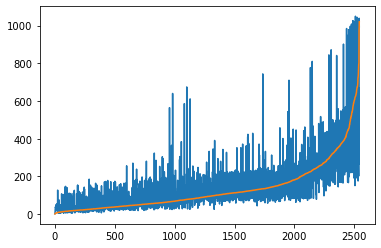

In [13]:
plt.plot(x,test['y2'] ,x,test['y'] )